(200, 3)
poly line in layer 2.


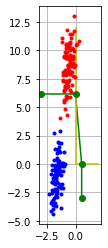

poly line in layer 1.


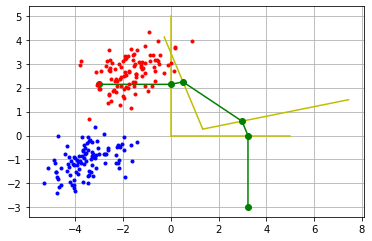

poly line in original data space.


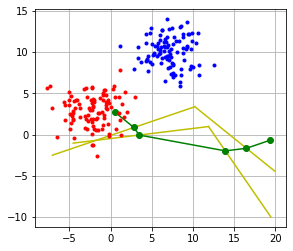

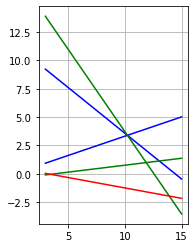

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#-----------------------------------------------------------------

'''
Package: visulaization of a two-hidden layer, dimension two, relu neural network.
'''
def point_on_2_lines(line_1, line_2):
    point = np.cross(line2, line1)
    point = point / point[2]
    return point

def line_from_2_points(point_1, point_2):
    return np.cross(point_1, point_2)

def intersect_2_coord_axes(line):
    return np.array([[- line[2]/line[0],  0,  1],
                     [ 0, - line[2]/line[1],  1]])

def intersect_1_coord_axis(point, direction):
    '''
    direction = np.array([u, v, 0]) and in homogeneous coordinates 
    should be interpreted as a point at infinity
    '''
    line = line_from_2_points(point, direction)
    points = intersect_2_coord_axes(line)
    if points[0, 0] >= 0 and points[1, 1] >= 0:
        is_the_point = (points - np.vstack((point, point))).dot(direction) > 0
        if is_the_point[0] and not is_the_point[1]:
            return points[0,:]
        if is_the_point[1] and not is_the_point[0]:
            return points[1,:]
    elif points[0, 0] >= 0 and points[1, 1] < 0: 
        return  points[0,:]
    elif points[0, 0] < 0 and points[1, 1] >= 0:
        return points[1,:]
def pull_back(points, U):
    return points.dot(np.linalg.inv(U).T)

def pull_back_coordinate_axes(U, length):
    B = np.array([[length[0],0,1],
                  [0,length[1],1],
                  [0,   0,  1]])
    U_ = np.linalg.inv(U)
    B = B.dot(U_.T)
    x_axis = np.array([B[2, [0,1] ], 
                       B[0, [0,1] ]])
    y_axis = np.array([B[2, [0,1] ], 
                       B[1, [0,1] ]])
    return [x_axis, y_axis]

def polyline_in_layer2(line):    
    points = intersect_2_coord_axes(line)
    return np.vstack((np.array([0,-1,0]), 
                      points, 
                      np.array([-1,0,0])))

def polyline_in_layer1(poly_line):
    n_points = poly_line.shape[0]
    new_vertex_1 = intersect_1_coord_axis(poly_line[1,:], poly_line[0,:])
    new_vertex_2 = intersect_1_coord_axis(poly_line[2,:], poly_line[3,:])
    if new_vertex_1[1] == 0 and new_vertex_2[0] == 0:
        new_poly_line = np.vstack((np.array([0,-1,0]),
                                   new_vertex_1, 
                                   poly_line[1:(n_points-1),:], 
                                   new_vertex_2,
                                   np.array([-1,0, 0])))
    elif new_vertex_1[1] == 0 and new_vertex_2[1] == 0:
        new_poly_line = np.vstack((np.array([0,-1,0]),
                                   new_vertex_2, 
                                   poly_line[1:(n_points-1),:], 
                                   new_vertex_2,
                                   np.array([0,-1, 0])))
    elif new_vertex_1[0] == 0 and new_vertex_2[0] == 0:
        new_poly_line = np.vstack((np.array([-1,0,0]),
                                   new_vertex_2, 
                                   poly_line[1:(n_points-1),:], 
                                   new_vertex_2,
                                   np.array([-1,0,0])))
    return new_poly_line

def plot_polyline_axes_and_data(poly_line, data, data_labeled, axes, length_of_ends):
    poly_line_copy = poly_line.copy()
    n_points = poly_line.shape[0]
    poly_line_copy[0,:] = poly_line_copy[1,:] + length_of_ends*poly_line_copy[0,:] / np.linalg.norm(poly_line_copy[0,:])
    poly_line_copy[n_points-1,:] = poly_line_copy[n_points-2,:] + length_of_ends*poly_line_copy[n_points-1,:] / np.linalg.norm(poly_line_copy[n_points-1,:])
    fig, axs = plt.subplots(1,1)
    axs.set_aspect('equal')
    axs.plot(poly_line_copy[:,0], poly_line_copy[:,1], 'g')
    for axis in axes:
        axs.plot(axis[:,0], axis[:,1], 'y')
    for point in poly_line_copy:
        axs.plot(point[0], point[1], 'go')
    for point in data[data_labeled[:,2]==1]:
        axs.plot(point[0], point[1], 'b.')
    for point in data[data_labeled[:,2]==0]:
        axs.plot(point[0], point[1], 'r.')
    plt.grid()
    plt.show()
    return None

def plot_polyline_and_data(poly_line, data, data_labeled, length_of_ends):
    poly_line_copy = poly_line.copy()
    n_points = poly_line.shape[0]
    poly_line_copy[0,:] = poly_line_copy[1,:] + length_of_ends*poly_line_copy[0,:] / np.linalg.norm(poly_line_copy[0,:])
    poly_line_copy[n_points-1,:] = poly_line_copy[n_points-2,:] + length_of_ends*poly_line_copy[n_points-1,:] / np.linalg.norm(poly_line_copy[n_points-1,:])
    fig, axs = plt.subplots(1,1)
    axs.set_aspect('equal')
    axs.plot(poly_line_copy[:,0], poly_line_copy[:,1], 'g')
    for point in poly_line_copy:
        axs.plot(point[0], point[1], 'y.')
    for point in data[data_labeled[:,2]==1]:
        axs.plot(point[0], point[1], 'b.')
    for point in data[data_labeled[:,2]==0]:
        axs.plot(point[0], point[1], 'r.')
    plt.grid()
    plt.show()
    return None

def plot_polyline(poly_line, length_of_ends):
    poly_line_copy = poly_line.copy()
    n_points = poly_line.shape[0]
    poly_line_copy[0,:] = poly_line_copy[1,:] + length_of_ends*poly_line_copy[0,:] / np.linalg.norm(poly_line_copy[0,:])
    poly_line_copy[n_points-1,:] = poly_line_copy[n_points-2,:] + length_of_ends*poly_line_copy[n_points-1,:] / np.linalg.norm(poly_line_copy[n_points-1,:])
    fig, axs = plt.subplots(1,1)
    axs.set_aspect('equal')
    axs.plot(poly_line_copy[:,0], poly_line_copy[:,1], 'g')
    for point in poly_line_copy:
        axs.plot(point[0], point[1], 'yo')
    plt.grid()
    plt.show()
    return None

def plot_polylines_in_all_layers(data_matrix, W1, W2, W3, l_ends, l_axes1, l_axes2):
    x = data_matrix
    x_ = x.copy()
    x_[:,2] = 1
    length=3
    axes = [ np.array([[0, 0], [l_axes2[0], 0]]), np.array([[0, 0], [0, l_axes2[1]]]) ]

    print('poly line in layer 2.')
    pl_2 = polyline_in_layer2(W3)
    #plot_polyline(pl_2, 2)
    #plot_polyline_and_data(pl_2, x_.dot(W1.T).dot(W2.T), x, l_ends)
    plot_polyline_axes_and_data(pl_2, x_.dot(W1.T).dot(W2.T), x, axes, l_ends)

    print('poly line in layer 1.')
    pl_1 = pull_back(pl_2, W2)
    pl_1 = polyline_in_layer1(pl_1)
    axes = [ np.array([[0, 0], [l_axes1[0], 0]]), np.array([[0, 0], [0, l_axes1[1]]]) ]
    axes_2 = pull_back_coordinate_axes(W2, l_axes2)
    axes.extend(axes_2)
    #plot_polyline(pl1, 3)
    #plot_polyline_and_data(pl_1, x_.dot(W1.T), x, l_ends)
    plot_polyline_axes_and_data(pl_1, x_.dot(W1.T), x, axes, l_ends)

    print('poly line in original data space.')
    pl = pull_back(pl_1, W1)
    axes = pull_back_coordinate_axes(W1, l_axes1)
    axes_2 = pull_back_coordinate_axes(W2.dot(W1), l_axes2)
    axes.extend(axes_2)
    #plot_polyline(pl, 5)
    #plot_polyline_and_data(pl, x_, x, l_ends)
    plot_polyline_axes_and_data(pl, x_, x, axes, l_ends)
    return None

def matrix_from_weights(Matrix, bias):
    W = np.hstack((Matrix, bias[:, np.newaxis]))
    W = np.vstack((W, np.array([0,0,1])))
    return W

#-----------------------------------------------------------------

path='/users/kent/stadiset/Research Work/ReLU/'
data = pd.read_csv(path+"score.csv")
x = data.to_numpy()
#print(x[0:5,:])
print(x.shape)

#-----------------------------------------------------------------

weights1 = np.array(([0.1532, -0.4506],
                     [-0.2035, -0.2523]))

weights2 = np.array(([ 0.3024,  0.1265],
                     [-0.5793,  2.8742]))

weights3 = np.array(([0.4654, -2.8651]))

bias1 = np.array(([-0.0394,  
                   2.9368]))

bias2 = np.array(([-4.3833e-01, 
                   -4.1123e-05]))

bias3 = np.array(([5.3234]))

#-----------------------------------------------------------------

W1 = matrix_from_weights(weights1, bias1)
W2 = matrix_from_weights(weights2, bias2)
W3 = np.array(([5.3234,  0.4654, -2.8651]))

#-----------------------------------------------------------------

plot_polylines_in_all_layers(x, W1, W2, W3, l_ends=3, l_axes1=[5,5], l_axes2=[2,12])

#-----------------------------------------------------------------

'''
direct line plot
'''

def line_to_plot(line, x_left, x_right):
    #line[0]*x + line[1]*y + line[2] = 0
    x = np.array([x_left, x_right])
    y = - line[0]/line[1]*x - line[2]/line[1]
    return np.array([x,
                     y])

W21 = W2.dot(W1)
W21_ = np.linalg.inv(W21)

# W1  coord lines of layer 1 in data space
# W21 coord lines of layer 2 in data space
# W3.dot(W21) separating line

L = np.vstack([ W1[ [1,0], : ],
               W21[ [1,0], : ],
                W3.dot(W21)])

k=L.shape[0]

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')
for i in range(2):
    Lp = line_to_plot(L[i], 10-7, 10+5)
    axs.plot(Lp[0], Lp[1], 'b')
for i in range(2,k-1):
    Lp = line_to_plot(L[i], 10-7, 10+5)
    axs.plot(Lp[0], Lp[1], 'g')

Lp = line_to_plot(L[k-1], 10-7 , 10+5)
axs.plot(Lp[0], Lp[1], 'r')
plt.grid()
plt.show()


In [2]:
print(L)

[[-0.2035     -0.2523      2.9368    ]
 [ 0.1532     -0.4506     -0.0394    ]
 [-0.67364846 -0.46412808  8.46373386]
 [ 0.02058493 -0.16817739 -0.07873936]
 [-0.20393418 -1.11128073  0.65476063]]


In [3]:
print(W1)

[[ 0.1532 -0.4506 -0.0394]
 [-0.2035 -0.2523  2.9368]
 [ 0.      0.      1.    ]]


In [8]:
P = np.array([ 1, 1, 1])
v = np.array([-2, 1, 0])
ray = np.array([P,
                v]) 
print(ray)

[[ 1  1  1]
 [-2  1  0]]


In [14]:
W21 = W2.dot(W1)
W1_ = np.linalg.inv(W1)
W21_ = np.linalg.inv(W21)


print(W1_)
print(W21_)

[[ 1.93556613 -3.45686127 10.22837149]
 [-1.5611879  -1.17530215  3.39011654]
 [ 0.          0.          1.        ]]
[[ 3.77811449 -1.36900451 11.88437611]
 [-5.4836609  -0.16756629  0.98645656]
 [ 0.          0.          1.        ]]


In [13]:
W21 = W2.dot(W1)
W1_ = np.linalg.inv(W1)
W21_ = np.linalg.inv(W21)


O = np.array([W1_[:,2], W21_[:,2] ])
print(O)

[[10.22837149  3.39011654  1.        ]
 [11.88437611  0.98645656  1.        ]]


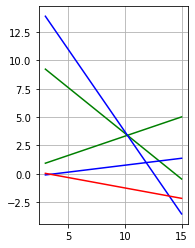

In [11]:
P = np.array([ 1, 1, 1])
v = np.array([-2, 1, 0])
ray = np.array([P,
                v]) 

P[0] > 0 and P[1] > 0

def point_on_axis_and_rays(i, ray):
    s = - ray[0,i] / ray[1,i]
    if s>0: 
        true_point = True 
    else: 
        true_point = False
    return ray[0,:] + s*ray[1,:], true_point
    
 
def point_on_quadrant_and_ray(ray):
    for i in range(2):
        Q, true_point = point_on_axis_and_rays(i, ray)
        if Q[i] >= 0. : 
            return Q, true_point
        
def point_on_2_lines(line_1, line_2):
    point = np.cross(line2, line1)
    point = point / point[2]
    return point

#np.linalg.inv(W1).dot(point_on_quadrant_and_ray(W1.dot(ray)))


point_on_quadrant_and_ray(ray)


W21 = W2.dot(W1)
W1_ = np.linalg.inv(W1)
W21_ = np.linalg.inv(W21)


O = np.array([W1_[:,2], W21_[:,2] ])


def line_to_plot(line, x_left, x_right):
    #line[0]*x + line[1]*y + line[2] = 0
    x = np.array([x_left, x_right])
    y = - line[0]/line[1]*x - line[2]/line[1]
    return np.array([x,
                     y])

W21 = W2.dot(W1)
W21_ = np.linalg.inv(W21)

# W1  coord lines of layer 1 in data space
# W21 coord lines of layer 2 in data space
# W3.dot(W21) separating line

L = np.vstack([ W1[ [1,0], : ],
               W21[ [1,0], : ],
                W3.dot(W21)])
k=L.shape[0]

fig, axs = plt.subplots(1,1)
axs.set_aspect('equal')
for i in range(2):
    Lp = line_to_plot(L[i], 10-7, 10+5)
    axs.plot(Lp[0], Lp[1], 'g')
for i in range(2,k-1):
    Lp = line_to_plot(L[i], 10-7, 10+5)
    axs.plot(Lp[0], Lp[1], 'b')
Lp = line_to_plot(L[k-1], 10-7 , 10+5)
axs.plot(Lp[0], Lp[1], 'r')
axs.plot(O[0,0], O[0,1], 'go')
axs.plot(O[1,0], O[1,1], 'bo')

plt.grid()
plt.show()